In [153]:
import os
import numpy as np
import matplotlib.pyplot as plt
from herd_ODE_class import *
import time
from datetime import datetime
from aux_funcs_viz import *
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
sns.set()
sns.set_style("white")


In [159]:

data = np.loadtxt("data.out")

costdata = np.loadtxt("cost.out")

ls = 1.5

#H = [R, T, R', T', Q, A] // T = 'Theta'
R_array = data[:,0]
T_array = data[:,1]
R_prime_array = data[:,2]
T_prime_array = data[:,3]
Q_array = data[:,4]
A_array = data[:,5]
theta_dog = data[:,6]
uT = data[:,7]
uR = data[:, 8]
times = np.arange(0, len(R_array), 1)

control_term_1 = np.power(uT, 2)/R_array
control_term_1p = np.power(T_prime_array, 2)/R_array
cost_term_1 = np.abs(np.fmod(T_array, 2*np.pi)-np.pi)
cost_term_2 = A_array
cost_term_3 = np.abs(R_array-2.0*ls)

delta_theta_dog_herd = np.cos(theta_dog-T_array)

print("Final areas", A_array[-10:])
print("Final forces", np.exp(-1.0*R_array[-10:]/ls))
print("Final theta-primes ", T_prime_array[-10:])

Final areas [4.9896039  4.98960135 4.98959925 4.98959756 4.98959624 4.98959524
 4.98959455 4.98959413 4.98959396 4.98959401]
Final forces [1.29078611e-14 1.28220949e-14 1.27368986e-14 1.26522684e-14
 1.25682004e-14 1.24846911e-14 1.24017367e-14 1.23193334e-14
 1.22374777e-14 1.21561658e-14]
Final theta-primes  [-0.2419794  -0.23174254 -0.22151591 -0.2112995  -0.20109331 -0.19089731
 -0.18071151 -0.17053588 -0.16037043 -0.15021514]


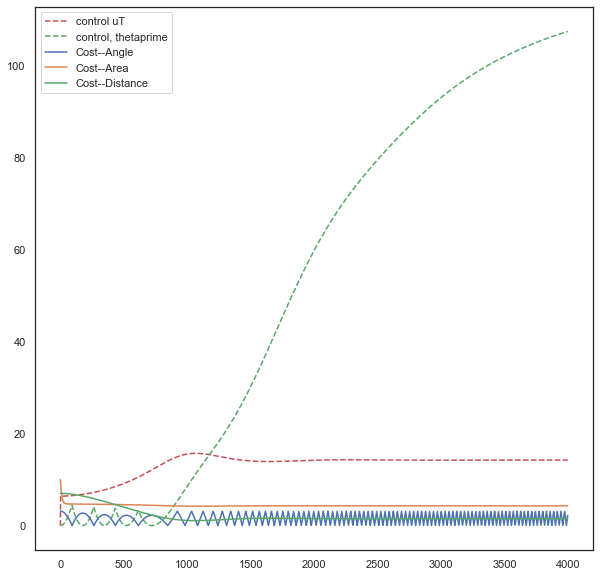

In [155]:
plt.figure(figsize = (10,10))
plt.plot(times, control_term_1, 'r--', label = "control uT")
plt.plot(times, control_term_1p, 'g--', label = "control, thetaprime")
plt.plot(times, cost_term_1, label = "Cost--Angle")
plt.plot(times, cost_term_2, label = "Cost--Area")
plt.plot(times, cost_term_3, label = "Cost--Distance")
plt.legend()

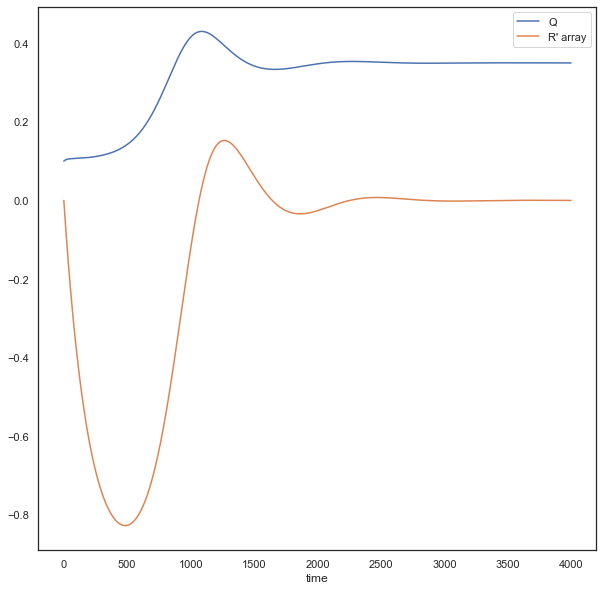

<Figure size 432x288 with 0 Axes>

In [157]:

plt.figure(figsize = (10,10))
#plt.plot(times, R_array, label = "R")
#plt.plot(times, delta_theta_dog_herd, label = "delta_theta_dog_herd")
#plt.plot(times, A_array, '--', label = "Area")
#plt.plot(times, old_area_array, 'r--', label = "Old Area")
#plt.plot(times, theta_dog, '--', label = "theta_dog")
#plt.plot(times, uT, label = "uT")
#plt.plot(times, uR, label = "uR")
plt.plot(times, Q_array, label = "Q")
#plt.plot(times, T_array, label = "Theta")
#plt.plot(times, T_prime_array, 'g--', label = "Theta Prime")
plt.plot(times, R_prime_array, label =  "R' array")
plt.xlabel("time")
#plt.xlim(0,100)
plt.legend()
plt.show()

plt.savefig("fig_analysis_1.png")

#os.system("open fig_analysis_1.png")

In [158]:
# let's test out the plotting here

In [160]:
def plot_herd(self, curr_time):

		'''
		Q=a/b; a = Q*b; a = A/Rb. => Qb = A/Rb ==> b = sqrt(A/RQ)
 
		'''

		#parameters
		R = self.H[0]
		b = np.sqrt(self.H[5]/(self.H[4]*self.H[0]))
		a = self.H[4]*b
		theta = self.H[1]


		#set arrays
		phi_array = np.arange(-a, a, 0.001)
		r_array_1 = np.zeros(len(phi_array))
		r_array_2 = np.zeros(len(phi_array))

		#create shape
		for kk in range(len(phi_array)):
			r_array_1[kk] = R+b*np.sqrt(1-(phi_array[kk])**2/a**2)
			r_array_2[kk] = R-b*np.sqrt(1-(phi_array[kk])**2/a**2)

		phi_array_sum = np.concatenate((phi_array, phi_array))
		r_array_sum = np.concatenate((r_array_1, r_array_2))

		##below is stuff to use if plotting in x-y space. Otherwise, just use polar array. -------------------

		# ------------------- END X-Y PLOTTING -----------------------------------------

		max_plot_radius = 20

		plot_name = './test_plots/test_plot'+str(self.counterr).zfill(4)
		plot_title = "System at time " + str(curr_time)

		plt.figure(figsize=(10,10))
		plt.axes(projection = 'polar')
		plt.polar(phi_array_sum+theta, r_array_sum, '.', label = 'herd')
		#plt.polar(self.theta_dog, self.ls, 'ro', markersize = 5, label = 'dog_orientation')
		plt.ylim(0,max_plot_radius)
		plt.title(plot_title)
		plt.legend()
		plt.savefig(plot_name)

		self.counterr+=1

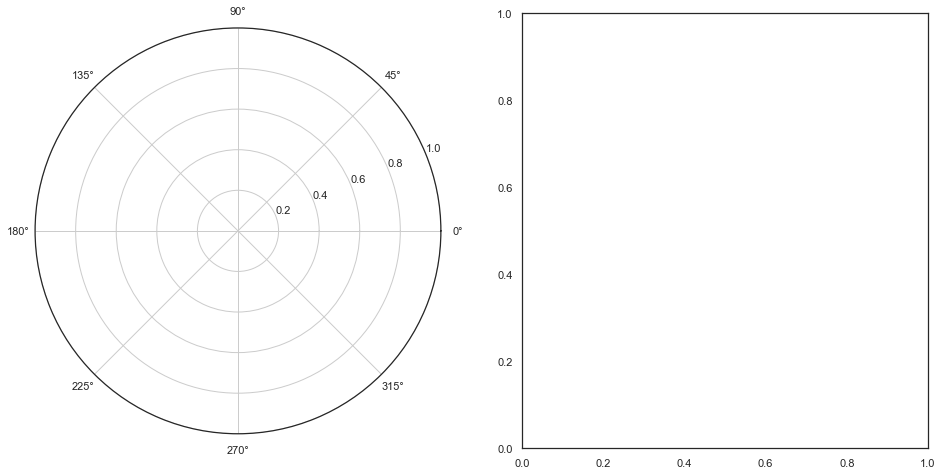

In [165]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121, projection = 'polar')
ax2 = fig.add_subplot(122)